In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load the CSV files

- Please uploadn the created the train and test CSV files to the colab environment.

In [ ]:
# define the paths
TRAIN_CSV = "/content/drive/MyDrive/AIClub_AP_Damacharla_Harika/Datasets/music_instrument_feature_train.csv"
TEST_CSV = "/content/drive/MyDrive/AIClub_AP_Damacharla_Harika/Datasets/music_instrument_feature_test.csv"

In [ ]:
import pandas as pd

# load the train csv
data_train = pd.read_csv(TRAIN_CSV)
data_train.head()

,RMSE,SPECTRAL_CENTROID,SPECTRAL_BANDWIDTH,ROLLOFF,ZERO_CROSSING_RATE,MFCC_FEATURE_0,MFCC_FEATURE_1,MFCC_FEATURE_2,MFCC_FEATURE_3,MFCC_FEATURE_4,...,MFCC_FEATURE_11,MFCC_FEATURE_12,MFCC_FEATURE_13,MFCC_FEATURE_14,MFCC_FEATURE_15,MFCC_FEATURE_16,MFCC_FEATURE_17,MFCC_FEATURE_18,MFCC_FEATURE_19,LABEL
0,0.062325,2316.989020,2757.101549,5547.035945,0.084672,-187.26079,89.72672,21.389318,22.149347,3.905026,...,3.366895,0.238650,0.306749,-9.776440,-6.835085,-6.527420,0.002186,-2.380433,3.513683,piano
1,0.202179,2671.323870,2686.613461,5805.765663,0.128249,-4.85361,83.54674,0.746411,30.466993,9.416390,...,3.446559,-2.810793,0.588865,-4.093653,-1.115683,-2.824470,0.741342,-8.780810,-3.132610,electric_guitar
2,0.045504,907.921383,1027.232235,1437.755409,0.063886,-307.56058,192.76907,-23.081457,15.368303,-8.382542,...,-9.424538,-7.596852,-4.458697,1.292051,2.826587,2.027088,1.076499,-0.412366,-3.329628,piano
3,0.026259,437.364110,711.886751,652.621695,0.028279,-470.48984,236.54242,62.554170,0.513728,4.260558,...,-0.933101,-6.501129,-9.897833,-6.918441,-5.304530,-8.581144,-8.919804,-2.112768,3.097034,piano
4,0.052508,821.558837,979.045588,1135.876465,0.060675,-337.16296,200.18973,5.095531,-18.062876,-1.523398,...,-5.295030,-4.428859,0.438058,-4.329932,-5.488426,-0.991266,-3.633189,-7.330574,-1.882433,piano


### Encoding Labels

In [ ]:
# labels are there as string otherwise words
# need to convert the labels into numbers
print(data_train["LABEL"].value_counts())
LABELS = list(data_train["LABEL"].unique())
# sort the labels
LABELS.sort()
print(LABELS)

LABEL
electric_guitar    616
piano              568
Name: count, dtype: int64
['electric_guitar', 'piano']


### Encoding Structure
- We are encoding the labels in alphabetical order.
- electric_guitar gets 0 while piano gets 1.

In [ ]:
# convert into numbers
data_train["LABEL"] = pd.factorize(data_train["LABEL"], sort = True)[0]
data_train["LABEL"].value_counts()

LABEL
0    616
1    568
Name: count, dtype: int64

### Seperate features and labels
- Label is at the last index which we can reference by -1

In [ ]:
# get all features without the labels
# all the rows
# all the columns without the last column
X = data_train.iloc[:, :-1].values
# all rows
# only the lastb column, which is the label
Y = data_train.iloc[:, -1].values

In [ ]:
Y = data_train.iloc[:, -1].values
Y

array([1, 0, 1, ..., 0, 1, 1])

### Train the Model using Cross Validation

In [ ]:

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

def cross_validation(model, data = (X, Y), splits = 5):
    kf = KFold(n_splits=splits, shuffle=True, random_state=42)

    # Perform k-fold cross-validation
    accuracy = []
    precision = []
    recall = []

    for train_index, valid_index in kf.split(data[0]):
        #print(train_index, valid_index, kf.split(data[0]))
        X_train, X_valid = data[0][train_index], data[0][valid_index]
        y_train, y_valid = data[1][train_index], data[1][valid_index]

        # Fit the defined model
        model.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = model.predict(X_valid)

        # Calculate accuracy, precision and recall
        accuracy.append(accuracy_score(y_pred, y_valid))
        precision.append(precision_score(y_pred, y_valid))
        recall.append(recall_score(y_pred, y_valid))


    # get arrays
    accuracy_set = np.array(accuracy)
    precision_set = np.array(precision)
    recall_set = np.array(recall)

    print("Mean Accuracy: {}".format(accuracy_set.mean()))
    print("Mean Precision: {}".format(precision_set.mean()))
    print("Mean Recall: {}".format(recall_set.mean()))

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# fit the logistic regression
lr = LogisticRegression()

cross_validation(lr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mean Accuracy: 0.8327647858113423
Mean Precision: 0.850632242821281
Mean Recall: 0.811276146130728


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Use 5-fold cross validation for hyper-parameter tuning
# Try out different values and choose the best hyper-parameters
knn = KNeighborsClassifier(n_neighbors=6)

cross_validation(knn)

Mean Accuracy: 0.8074483301151398
Mean Precision: 0.7565589278305184
Mean Recall: 0.8264544470107301


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Use 5-fold cross validation for hyper-parameter tuning
# Try out different values and choose the best hyper-parameters
rf = RandomForestClassifier()

cross_validation(rf)

Mean Accuracy: 0.8842880640778088
Mean Precision: 0.8753265823519094
Mean Recall: 0.8827388917211927


### Fit the best model

- Select the best model having the highest cross validation accuracy

In [ ]:
# Model with the lowest RMSE or highest r2
best_model = RandomForestClassifier()
#best_model = KNeighborsClassifier(n_neighbors=6)

# Fit the model on the full training dataset
best_model.fit(X, Y)

RandomForestClassifier()

### Load the test data

In [ ]:
# load the test data
data_test = pd.read_csv(TEST_CSV)
data_test.head()

,RMSE,SPECTRAL_CENTROID,SPECTRAL_BANDWIDTH,ROLLOFF,ZERO_CROSSING_RATE,MFCC_FEATURE_0,MFCC_FEATURE_1,MFCC_FEATURE_2,MFCC_FEATURE_3,MFCC_FEATURE_4,...,MFCC_FEATURE_11,MFCC_FEATURE_12,MFCC_FEATURE_13,MFCC_FEATURE_14,MFCC_FEATURE_15,MFCC_FEATURE_16,MFCC_FEATURE_17,MFCC_FEATURE_18,MFCC_FEATURE_19,LABEL
0,0.026849,832.086593,810.192938,1329.012733,0.060761,-397.64313,202.891080,-18.314198,4.595671,7.464968,...,-8.863886,-3.232259,-2.563379,-0.046393,2.097677,-5.204055,-7.896916,-1.224250,-2.038627,piano
1,0.206735,907.941817,1192.034489,1882.995793,0.041305,-173.60980,176.481120,-17.487156,64.209940,12.764759,...,0.397927,-0.608402,5.595345,6.094729,-0.741953,-0.132119,3.050113,3.534066,2.216849,electric_guitar
2,0.127130,1575.713245,1660.819435,3097.551270,0.082715,-152.60316,131.967160,-38.519390,26.204031,-2.906238,...,-7.109600,-21.862885,-18.213646,-12.271697,-6.269111,-10.996242,-6.022158,-9.656895,-3.849789,piano
3,0.091557,1349.112548,1824.864434,2982.762733,0.043472,-191.74979,126.553510,-14.354351,44.730534,6.745143,...,-0.156913,-4.892558,-2.856394,-1.636412,-1.651337,-9.099241,-1.596109,-5.335640,-3.951504,piano
4,0.098121,2161.061507,2520.661924,4807.536058,0.077603,-143.44803,86.847534,3.254393,34.360985,25.463150,...,5.298623,6.359572,7.874352,-3.941005,-5.958016,-8.297595,-10.491979,-5.848084,7.938865,piano


### Encode the test data as well

In [ ]:
# encode the labels
data_test["LABEL"] = pd.factorize(data_test["LABEL"], sort = True)[0]
data_test["LABEL"].value_counts()

LABEL
1    153
0    144
Name: count, dtype: int64

### Seperate features and labels

In [ ]:
# all the rows
# all the columns without the last column
x_test = data_test.iloc[:, : -1]
# all rows
# only the lastb column, which is the label
y_test = data_test.iloc[:, -1]

### Use the best model to make predictions

In [ ]:
# make predictions
predictions = best_model.predict(x_test)
print(predictions)

[1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1
 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0
 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1
 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0
 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1
 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1
 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0
 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


### Evaluate the test data

In [ ]:
#evaluation function

def model_evaluations(y_true, y_pred, labels):
  import matplotlib.pyplot as plt
  import seaborn as sns
  from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

  acc_score = accuracy_score(y_true, y_pred)
  print("Accuracy score: {}\n".format(acc_score))

  print("Classification Report: {}".format(classification_report(y_true, y_pred)))

  plt.figure(figsize = (5, 5))
  sns.heatmap(confusion_matrix(y_true, y_pred),  annot = True, fmt="g", cmap = "Blues", xticklabels = labels, yticklabels = labels)
  plt.title("Consfuion Matrix")
  plt.show()


Accuracy score: 0.8619528619528619

Classification Report:               precision    recall  f1-score   support

           0       0.86      0.86      0.86       144
           1       0.87      0.86      0.87       153

    accuracy                           0.86       297
   macro avg       0.86      0.86      0.86       297
weighted avg       0.86      0.86      0.86       297



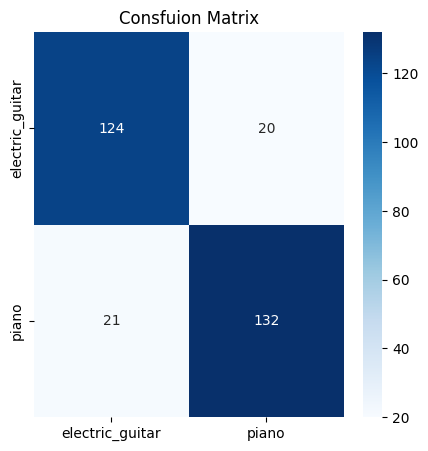

In [ ]:
# run the evaluation functions
model_evaluations(y_test, predictions, LABELS)

### Save the best model

- Make sure to donwload the model when you are planning to use the model later.

In [ ]:
import pickle

fh = open("/content/drive/MyDrive/AIClub_AP_Damacharla_Harika/Datasets/music_instruments_best_model", "wb")
pickle.dump(best_model, fh)
fh.close()